In [139]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Load files (mouse drug / clinical trial)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_to_load_df = pd.read_csv(clinical_trial_data_to_load)

# Merge data 
combined_data_df=pd.merge(clinical_trial_data_to_load_df,mouse_drug_data_to_load_df, how='left', on='Mouse ID')

# Preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [140]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# From the merged table, group by Drug and Timepoint
grouped_data= combined_data_df.groupby(["Drug", "Timepoint"])

# Mean Tumor Volume from "Tumor Volume (mm3)" in group data
mean_tumor_volume=grouped_data["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_df = pd.DataFrame(mean_tumor_volume).reset_index()

# Preview DataFrame
tumor_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [141]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Standar Error from "Tumor Volume (mm3)" in group data
se_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
se_tumor_volume_df = pd.DataFrame(se_tumor_volume).reset_index()

# Preview DataFrame
se_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [142]:
# Minor Data Munging to Re-Format the Data Frames
# .pivot
tumor_pivot_df = tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
sem_pivot_df = se_tumor_volume_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
tumor_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


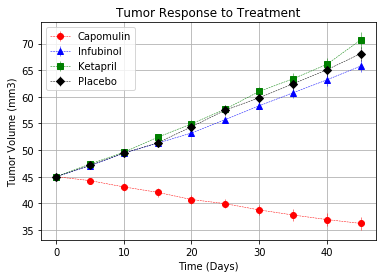

In [152]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(tumor_pivot_df.index, tumor_pivot_df["Capomulin"], sem_pivot_df["Capomulin"], fmt="o", color="r", linestyle="--", linewidth=0.5, label='Capomulin')
ax.errorbar(tumor_pivot_df.index, tumor_pivot_df["Infubinol"], sem_pivot_df["Infubinol"], fmt="^", color="b", linestyle="--", linewidth=0.5, label='Infubinol')
ax.errorbar(tumor_pivot_df.index, tumor_pivot_df["Ketapril"], sem_pivot_df["Ketapril"], fmt="s", color="g", linestyle="--", linewidth=0.5, label='Ketapril')
ax.errorbar(tumor_pivot_df.index, tumor_pivot_df["Placebo"], sem_pivot_df["Placebo"], fmt="D", color="black", linestyle="--", linewidth=0.5, label='Placebo' )
leg = ax.legend()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
plt.grid()

# Save the Figure
plt.savefig("../Images/Tumor_Response_Treatment.png")

plt.show()

## Metastatic Response to Treatment

In [145]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_data= combined_data_df.groupby(["Drug", "Timepoint"]) 

#  Mean Met from "Metastatic Sites" in group data
mean_met_site=grouped_data["Metastatic Sites"].mean()

# Convert to DataFrame
met_site_df = pd.DataFrame(mean_met_site)

# Preview DataFrame
met_site_df.head(13)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000

In [146]:
# Reset Index
met_site_df.reset_index(inplace=True)

In [147]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
se_met_site = grouped_data["Metastatic Sites"].sem()

# Convert to DataFrame
se_met_site_df = pd.DataFrame(se_met_site)

# Preview DataFrame
se_met_site_df.head(15)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034

In [148]:
# Reset Index
se_met_site_df.reset_index(inplace=True)

In [158]:
# Minor Data Munging to Re-Format the Data Frames
# .pivot
met_site_pivot_df = met_site_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
sem_met_pivot_df = se_met_site_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# # Preview that Reformatting worked
met_site_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


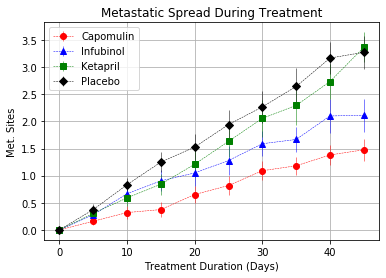

In [159]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(met_site_pivot_df.index, met_site_pivot_df["Capomulin"], sem_met_pivot_df["Capomulin"], fmt="o", color="r", linestyle="--", linewidth=0.5, label='Capomulin')
ax.errorbar(met_site_pivot_df.index, met_site_pivot_df["Infubinol"], sem_met_pivot_df["Infubinol"], fmt="^", color="b", linestyle="--", linewidth=0.5, label='Infubinol')
ax.errorbar(met_site_pivot_df.index, met_site_pivot_df["Ketapril"], sem_met_pivot_df["Ketapril"], fmt="s", color="g", linestyle="--", linewidth=0.5, label='Ketapril')
ax.errorbar(met_site_pivot_df.index, met_site_pivot_df["Placebo"], sem_met_pivot_df["Placebo"], fmt="D", color="black", linestyle="--", linewidth=0.5, label='Placebo')
leg = ax.legend()
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
plt.grid()

# Save the Figure
plt.savefig("../Images/Spread_Metastatic.png")

plt.show()

## Survival Rates

In [160]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count=grouped_data["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)

# Rename column
mouse_renamed = mouse_count_df.rename(columns={"Mouse ID": "Mouse Count"})

# Reset Index
mouse_renamed.reset_index(inplace=True)
mouse_renamed.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [163]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot_df = mouse_renamed.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the formatted table
mouse_count_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [164]:
# Creating new columns -> calculating % of each drug
mouse_count_pivot_df["Capomulin Percentage"]=mouse_count_pivot_df["Capomulin"]/mouse_count_pivot_df["Capomulin"].iloc[0] * 100
mouse_count_pivot_df["Infubinol Percentage"]=mouse_count_pivot_df["Infubinol"]/mouse_count_pivot_df["Infubinol"].iloc[0] * 100
mouse_count_pivot_df["Ketapril Percentage"]=mouse_count_pivot_df["Ketapril"]/mouse_count_pivot_df["Ketapril"].iloc[0] * 100
mouse_count_pivot_df["Placebo Percentage"]=mouse_count_pivot_df["Placebo"]/mouse_count_pivot_df["Placebo"].iloc[0] * 100

# Columns I want to work with
mice_table = mouse_count_pivot_df[["Capomulin Percentage", "Infubinol Percentage", 
                                   "Ketapril Percentage", "Placebo Percentage"]]
# Preview
mice_table.head()

Drug,Capomulin Percentage,Infubinol Percentage,Ketapril Percentage,Placebo Percentage
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


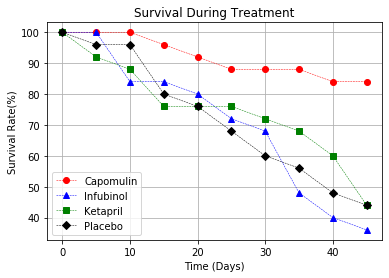

In [170]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()

ax.errorbar(mice_table.index, mice_table["Capomulin Percentage"], fmt="o", color="r", linestyle="--", linewidth=0.5, label='Capomulin')
ax.errorbar(mice_table.index, mice_table["Infubinol Percentage"], fmt="^", color="b", linestyle="--", linewidth=0.5, label='Infubinol')
ax.errorbar(mice_table.index, mice_table["Ketapril Percentage"], fmt="s", color="g", linestyle="--", linewidth=0.5, label='Ketapril')
ax.errorbar(mice_table.index, mice_table["Placebo Percentage"], fmt="D", color="black", linestyle="--", linewidth=0.5, label='Placebo')
leg = ax.legend()
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate(%)")
ax.set_title("Survival During Treatment")
plt.grid()

# Save the Figure
plt.savefig("../Images/Survival_treatment.png")

plt.show()

## Summary Bar Graph

In [95]:
# Calculate the percent changes for each drug
drug_list = ["Capomulin", "Infubinol","Ketapril","Placebo"]
tumor_start_point = [tumor_pivot_df["Capomulin"][0],tumor_pivot_df["Infubinol"][0],
              tumor_pivot_df["Ketapril"][0],tumor_pivot_df["Placebo"][0]]
             
tumor_end_point = [tumor_pivot_df["Capomulin"][45],tumor_pivot_df["Infubinol"][45],
              tumor_pivot_df["Ketapril"][45],tumor_pivot_df["Placebo"][45]]

tumor_summary_df=pd.DataFrame({"Drug" : drug_list,
                               "Tumor Size -Start Point-" : tumor_start_point,
                               "Tumor Size -End Point-" : tumor_end_point})

tumor_summary_df["Percent Change"] = (tumor_summary_df["Tumor Size -End Point-"] - tumor_summary_df["Tumor Size -Start Point-"])/tumor_summary_df["Tumor Size -Start Point-"]*100
tumor_summary_df

# Display the data to confirm
tumor_summary_df

,Drug,Tumor Size -Start Point-,Tumor Size -End Point-,Percent Change
0,Capomulin,45.0,36.236114,-19.475303
1,Infubinol,45.0,65.755562,46.123472
2,Ketapril,45.0,70.662958,57.028795
3,Placebo,45.0,68.084082,51.297960


In [175]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = {'Capomulin': tumor_summary_df["Percent Change"][0], 
                 'Infubinol': tumor_summary_df["Percent Change"][1],
                 'Ketapril': tumor_summary_df["Percent Change"][2],
                 'Placebo': tumor_summary_df["Percent Change"][3]
                }                

perc_change_tumor = pd.Series(percent_tuple)
perc_change_tumor

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [176]:
#Index: 4 drugs
drugs_index=perc_change_tumor.keys()
drugs_index

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object')

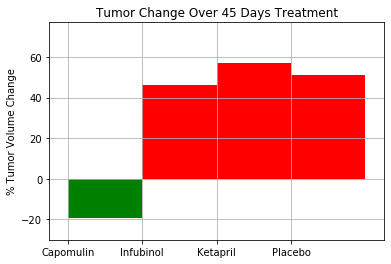

In [207]:
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Orient widths. Add labels, tick marks, etc.
# Creating the graph

summary_bar = plt.subplot()
x_axis = np.arange(0, len(drugs_index))

plt.bar(x_axis, tumor_summary_df['Percent Change'], color=['g', 'r', 'r', 'r'], width = 1, align='edge')

plt.xticks(x_axis,drugs_index)
plt.xlim(-1,len(x_axis)+1)
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(drugs_index)+0.25)
plt.ylim(-30, max(perc_change_tumor) + 20)
plt.grid()

# Save the Figure
plt.savefig("../Images/Tumor_over_treatment.png")
# Show the Figure
plt.show()

In [ ]:
# The observations are in a pdf file